In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [3]:
titanicdf=pd.read_csv('Desktop\\train.csv')
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Info about titanic dataframe
titanicdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?

In [6]:
#QUESTION 1
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

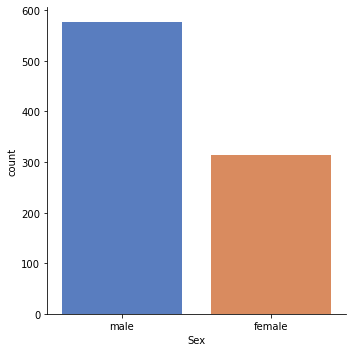

In [13]:
#Check gender
#Plot gender vs count graph
sns.catplot(x='Sex',kind="count",palette="muted",data=titanicdf)

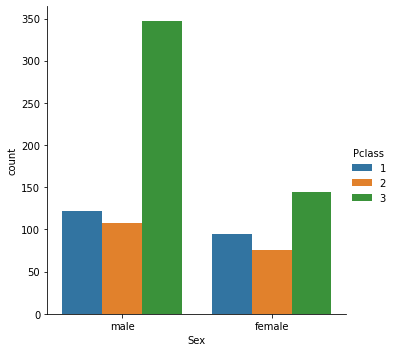

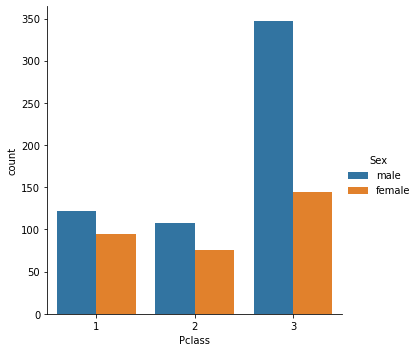

In [17]:
#Separate genders by classes
sns.catplot(x='Sex',kind='count',data=titanicdf,hue='Pclass')

#Reverse the data ie. we call Pclass and have the hues separated by sex
sns.catplot(x='Pclass',kind='count',data=titanicdf,hue='Sex')

In [18]:
#Split between males,females and children
#Make a function that'll treat anyone as under 16 as a child
def male_female_child(passenger):
    age,sex=passenger
    if age<16:
        return 'child'
    else:
        return sex
    
# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanicdf['person'] = titanicdf[['Age','Sex']].apply(male_female_child,axis=1)
titanicdf.head(10)
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


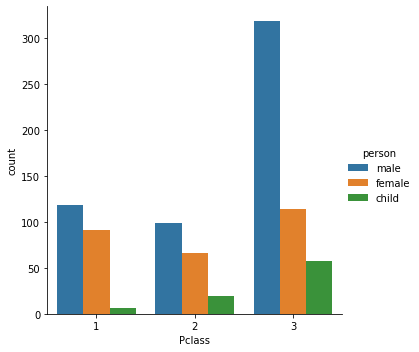

In [22]:
#Again plot separate the Pclass by males,female and child
sns.catplot(x='Pclass',kind='count',data=titanicdf,hue='person')

male      537
female    271
child      83
Name: person, dtype: int64

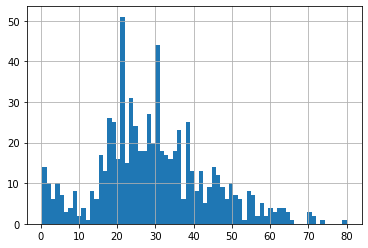

In [27]:
#Create histogram of the distribution of ages
titanicdf['Age'].hist(bins=70)

#Find mean age
titanicdf['Age'].mean()

#Find the value counts of males,females,children
titanicdf['person'].value_counts()

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x0000018587D8EA30>>

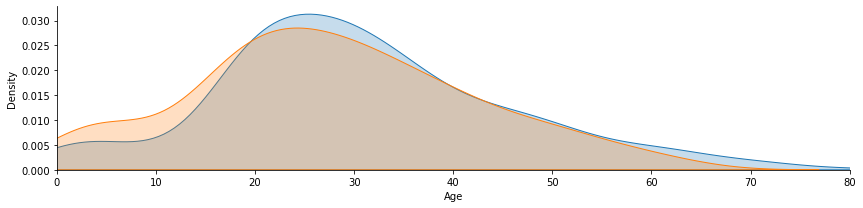

In [29]:
#Facet grid allows to do multiple plots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig=sns.FacetGrid(titanicdf,hue='Sex',aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest=titanicdf['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend

#Here separation is by only male and female 

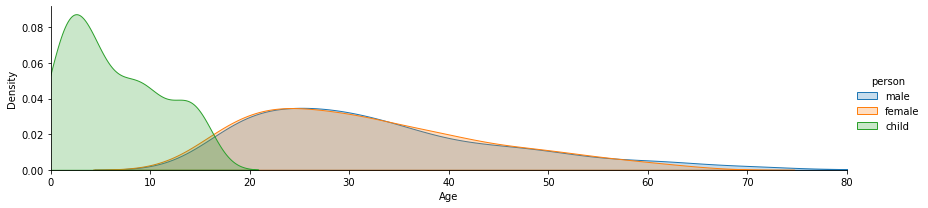

In [30]:
#However if we want to make KDE plot on ages of male vs female vs children

fig=sns.FacetGrid(titanicdf,hue='person',aspect=4)

fig.map(sns.kdeplot,'Age',shade= True)

oldest=titanicdf['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()


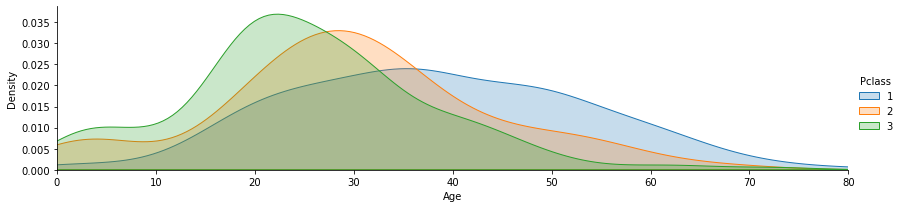

In [31]:
#Plot to show how age ranged by classes
fig=sns.FacetGrid(titanicdf,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade= True)

oldest=titanicdf['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()


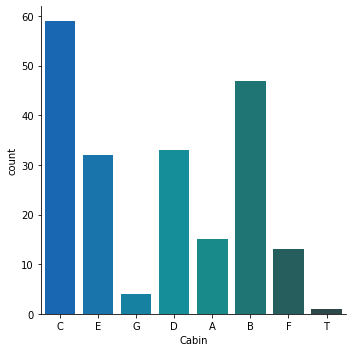

In [33]:
#QUESTION 2

#Dropping all null values in deck column
deck=titanicdf['Cabin'].dropna()
deck.head()

#To classify the level of the deck we just need the first letter so
# Set empty list
levels=[]

# Loop to grab first letter
for i in deck:
    levels.append(i[0])

# Reset DataFrame and use cat plot
cabindf=DataFrame(levels)
cabindf.columns=['Cabin']
sns.catplot(x='Cabin',data=cabindf,kind='count',palette='winter_d')


Interesting to note we have a 'T' deck value there which doesn't make sense, we can drop it out with the following code:

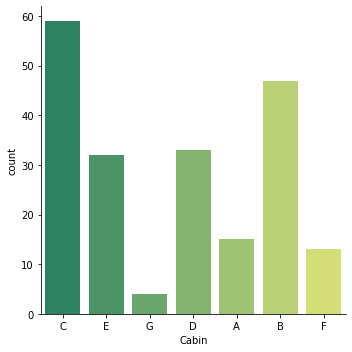

In [34]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabindf = cabindf[cabindf.Cabin != 'T']

#Plot again
sns.catplot(x='Cabin',data=cabindf,kind='count',palette='summer')

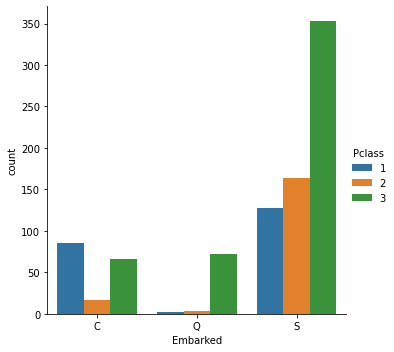

In [38]:
#QUESTION 3
#Make plot to see where people came from ie. embarked 
sns.catplot(x='Embarked',data=titanicdf,kind='count',hue='Pclass',order=['C','Q','S'])

C:\Users\Pragati Katiyar\AppData\Local\Temp\ipykernel_6840\3275232967.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanicdf['Alone'].loc[titanicdf['Alone']>0]='With Family'


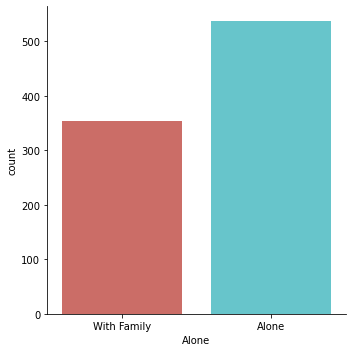

In [51]:
#QUESTION 4
#Make a new column for alone
titanicdf['Alone']=titanicdf.SibSp+titanicdf.Parch
titanicdf['Alone']

#Now if value of Alone=0 means no family else there was some family aboard
titanicdf['Alone'].loc[titanicdf['Alone']>0]='With Family'
#In titanicdf alone column, wherever the location of titanicdf Alone column
#was>0 set it to with family string

titanicdf['Alone'].loc[titanicdf['Alone']==0]='Alone'

titanicdf.head()

#Plot counts of alone or with family
sns.catplot(x='Alone',data=titanicdf,kind='count',palette='hls')



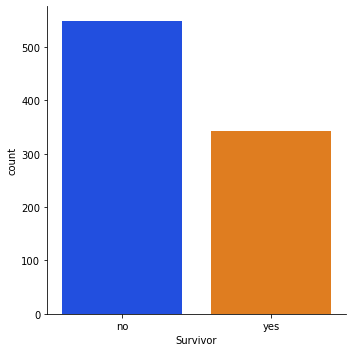

In [52]:
#QUESTION 5
#Make a new column survivor which take values from the values of survived column
#If value of survived is 0 then value of survivor is no else yes for 1
titanicdf['Survivor']=titanicdf.Survived.map({0:'no',1:'yes'})

#Plot of who survived and who did not
sns.catplot(x='Survivor',data=titanicdf,kind='count',palette='bright')




So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

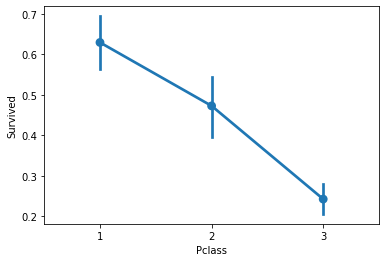

In [57]:
# Plot again, but now considering class
sns.pointplot(x='Pclass',y='Survived',data=titanicdf)

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

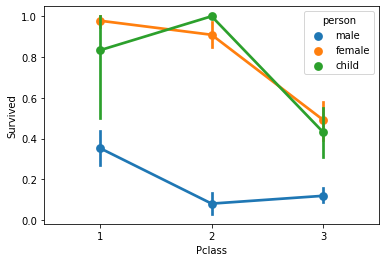

In [62]:
# Let's use a factor plot again, but now considering class and gender
sns.pointplot(x='Pclass',y='Survived',hue='person',data=titanicdf)

From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?


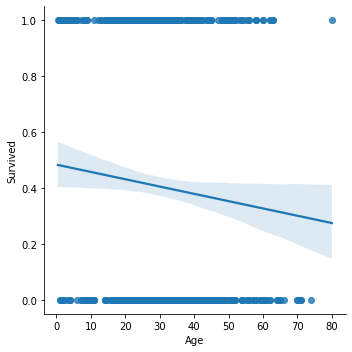

In [63]:
# Let's use a linear plot on age versus survival
sns.lmplot(x='Age',y='Survived',data=titanicdf)

#Looks like there is a general trend that the older the passenger was, 
#the less likely they survived. 
#Let's go ahead and use hue to take a look at the effect of class and age.

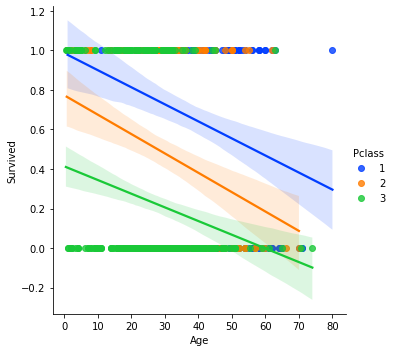

In [67]:
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanicdf,palette='bright')

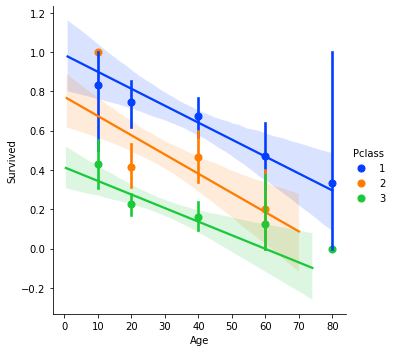

In [69]:
#We can also use the x_bin argument to clean up this figure and grab the data 
#and bin it by age with a std attached!
generations=[10,20,40,60,80] #generation bins

sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanicdf,palette='bright',x_bins=generations)


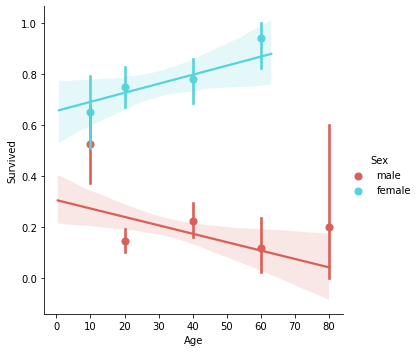

In [70]:
#Plot to see how gender and age relate with survival sets
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanicdf,palette='hls',x_bins=generations)

#This shows that an older female has better chance of survival than an older male



6.) Did the deck have an effect on the passengers survival rate?How does gender affect the same result? Did this answer match up with your intuition?
7.) Did having a family member increase the odds of surviving the crash?

In [96]:
#QUESTION 6
cabindf.head()

#Concatenate the sex and survived column in the same dataframe as we want both 
#these factors
#cabindf = pd.concat([cabindf, titanicdf['Sex']],axis=1)
#cabindf = pd.concat([cabindf, titanicdf['Survived']], axis=1)

cabindf


,Cabin,Sex,Survived
0,C,male,0
1,C,female,1
2,E,female,1
3,G,female,1
4,C,male,0
...,...,...,...
886,NaN,male,0
887,NaN,female,1
888,NaN,female,0
889,NaN,male,1


<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

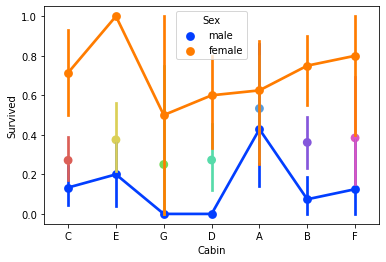

In [107]:
#Now plot since all required columns are in same dataframe
sns.pointplot(x='Cabin',y='Survived',data=cabindf,palette='hls')
#This shows how survival rate depends on deck level

#Now to see how gender affects this result
sns.pointplot(x='Cabin',y='Survived',data=cabindf, hue='Sex', palette='bright')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

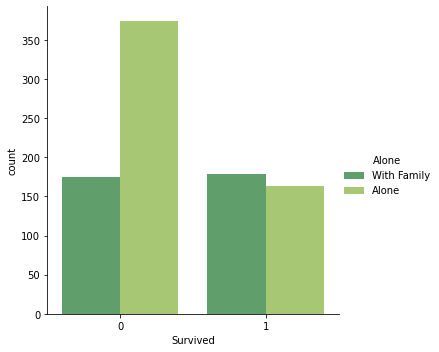

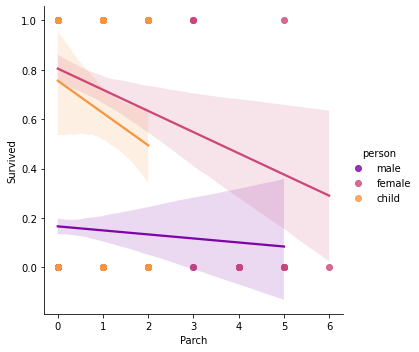

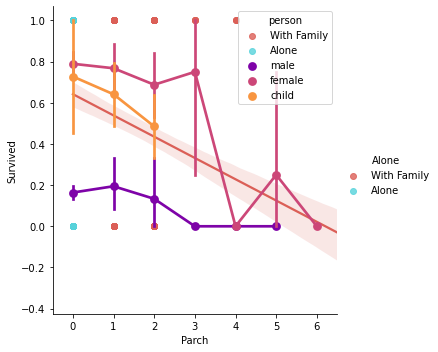

In [122]:
#QUESTION 7
#How being alone affected survival rate
sns.catplot(x='Survived',data=titanicdf,hue='Alone',palette='summer',kind='count')

#How being with family(sibling parent or children) affected survival rate
sns.lmplot(x='Parch',y='Survived',data=titanicdf, hue='person',palette='plasma')

sns.lmplot(x='SibSp',y='Survived',data=titanicdf, hue='Alone',palette='hls')

sns.pointplot(x='Parch',y='Survived',data=titanicdf, hue='person',palette='plasma')